## Step 1: Install Required Libraries

In [1]:
!pip install tensorflow opencv-python pillow numpy matplotlib

## Step 2: Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript, display, HTML
import IPython

## Step 3: Load and Prepare MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


## Step 4: Build Improved CNN Model

In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 903,658 (3.45 MB)

 Trainable params: 902,954 (3.44 MB)

 Non-trainable params: 704 (2.75 KB)

## Step 5: Train CNN Model with Data Augmentation

In [5]:

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 329s 341ms/step - accuracy: 0.6980 - loss: 0.9973 - val_accuracy: 0.9805 - val_loss: 0.0581 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 307s 327ms/step - accuracy: 0.9486 - loss: 0.1715 - val_accuracy: 0.9867 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 329s 335ms/step - accuracy: 0.9641 - loss: 0.1219 - val_accuracy: 0.9922 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 307s 327ms/step - accuracy: 0.9730 - loss: 0.0932 - val_accuracy: 0.9921 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 309s 329ms/step - accuracy: 0.9761 - loss: 0.0831 - val_accuracy: 0.9938 - val_loss: 0.0219 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 309s 329ms/step - accuracy: 0.9781 - loss: 0.0760 - val_accuracy: 0.9924 - val_loss: 0.0238 - learning_rate: 0.0010
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 318s 339ms/step - accuracy: 0.9788 

## Step 6: Evaluate Model

Test Accuracy: 0.9954
Test Loss: 0.0141


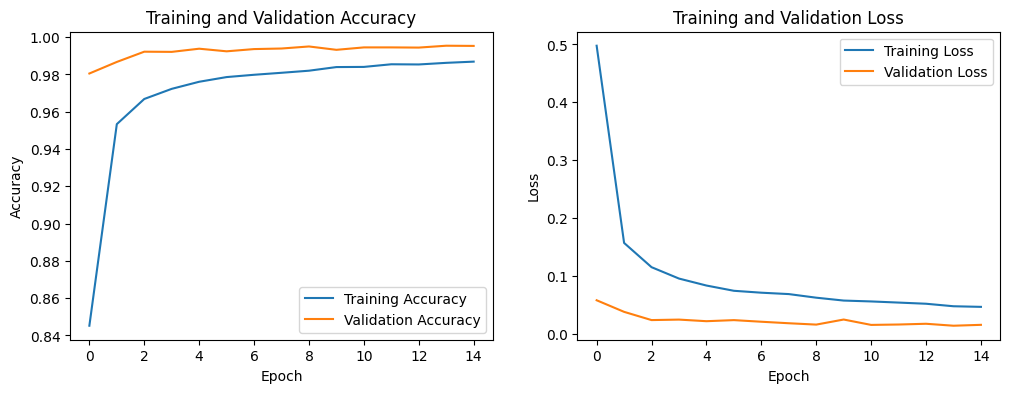

In [6]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {acc:.4f}')
print(f'Test Loss: {loss:.4f}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Step 7: Save Trained Model

In [7]:
model.save('mnist_cnn_improved.h5')
print("Model saved successfully!")

Model saved successfully!


## Step 8: Helper Functions for Image Preprocessing

In [8]:
def preprocess_image(image_path):
    """Preprocess image to match MNIST format"""

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if np.mean(img) > 127:
        img = 255 - img

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:

        c = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)


        padding = 10
        x = max(0, x - padding)
        y = max(0, y - padding)
        w = min(img.shape[1] - x, w + 2 * padding)
        h = min(img.shape[0] - y, h + 2 * padding)

        roi = img[y:y+h, x:x+w]
    else:
        roi = img


    h, w = roi.shape
    if h > w:
        new_h = 20
        new_w = int(w * 20 / h)
    else:
        new_w = 20
        new_h = int(h * 20 / w)

    resized = cv2.resize(roi, (new_w, new_h), interpolation=cv2.INTER_AREA)


    canvas = np.zeros((28, 28), dtype=np.uint8)


    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized


    canvas = canvas.astype('float32') / 255.0


    canvas = canvas.reshape(1, 28, 28, 1)

    return canvas

def display_prediction(image_path, prediction, confidence):
    """Display the image and prediction"""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {prediction} (Confidence: {confidence:.2%})')
    plt.axis('off')
    plt.show()

## Step 9: Capture Image Using Webcam

In [35]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript(f'''
        async function takePhoto() {{
            const div = document.createElement('div');

            // Create video element
            const video = document.createElement('video');
            video.style.width = '640px';
            video.style.height = '480px';
            video.setAttribute('autoplay', '');
            video.setAttribute('playsinline', '');


            const btn = document.createElement('button');
            btn.textContent = 'Capture Digit (Ensure white digit on dark background)';
            btn.style.padding = '10px';
            btn.style.margin = '10px';
            btn.style.fontSize = '16px';


            const instructions = document.createElement('p');
            instructions.textContent = 'Instructions: Write a single digit (0-9) on paper with dark ink. Hold it close to camera. Click capture when ready.';
            instructions.style.color = 'red';
            instructions.style.fontWeight = 'bold';

            div.appendChild(instructions);
            div.appendChild(video);
            div.appendChild(btn);
            document.body.appendChild(div);


            const stream = await navigator.mediaDevices.getUserMedia({{video: {{facingMode: 'environment'}}}});
            video.srcObject = stream;
            await video.play();


            await new Promise(resolve => btn.onclick = resolve);


            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);


            stream.getTracks().forEach(track => track.stop());


            div.remove();

            return canvas.toDataURL('image/jpeg', {quality});
        }}

        takePhoto().then(data => {{
            google.colab.kernel.invokeFunction('notebook.savePhoto', [data], {{}});
        }});
    ''')

    def save_photo(data):
        with open(filename, 'wb') as f:
            f.write(b64decode(data.split(',')[1]))
        print(f"Photo saved as {filename}")

    output.register_callback('notebook.savePhoto', save_photo)
    display(js)
print("Please capture an image of a handwritten digit...")
take_photo()

Please capture an image of a handwritten digit...


<IPython.core.display.Javascript object>

Photo saved as photo.jpg


## Step 10: Predict Digit from Captured Image

Press Enter after capturing the image...

Top Predictions:
1. Digit: 1 (Confidence: 99.97%)
2. Digit: 0 (Confidence: 0.02%)
3. Digit: 6 (Confidence: 0.00%)


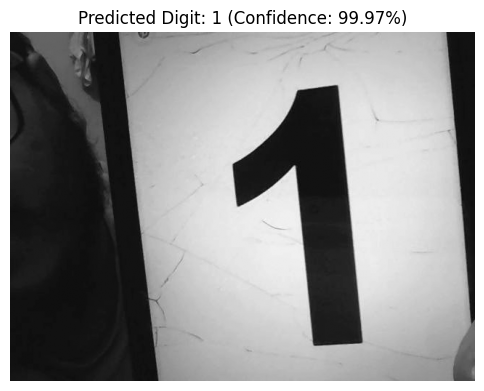


Final Prediction: Digit 1 with 99.97% confidence


In [36]:
def predict_digit(image_path='photo.jpg'):
    """Predict digit from captured image"""
    try:

        processed_img = preprocess_image(image_path)


        predictions = model.predict(processed_img, verbose=0)


        top_indices = np.argsort(predictions[0])[::-1][:3]

        print("\nTop Predictions:")
        for i, idx in enumerate(top_indices):
            confidence = predictions[0][idx]
            print(f"{i+1}. Digit: {idx} (Confidence: {confidence:.2%})")


        digit = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        display_prediction(image_path, digit, confidence)

        return digit, confidence

    except Exception as e:
        print(f"Error processing image: {e}")
        return None, None


input("Press Enter after capturing the image...")


digit, confidence = predict_digit()

if digit is not None:
    print(f"\nFinal Prediction: Digit {digit} with {confidence:.2%} confidence")
else:
    print("Failed to make prediction. Please try again.")